In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def correlacion_pearson(data_frame, columna1, columna2):
    return np.corrcoef(data_frame[columna1], data_frame[columna2])[0,1];

# Experimentos del TP de Negocio Por Medio
En esta carpeta de Jupyer vamos a poner lo relativo a realizar la experimentación computacional.
- **Asegurarse de correr los experimentos en el notebook Experimentos antes de utilizar este notebook.**
- En este archivo se lee el output de los experimentos y se muestra de manera gráfica esos resultados.

# Datasets
Para los experimentos se crean las siguientes familias de instancias para evaluar los distintos métodos.
1. **contagio-alto**: Son instancias con n = 1..200 y con densidad alta, es decir, los números de S son altos en comparación con W.
2. **contagio-bajo**: Son instancias con n = 1..200 y con densidad baja, o sea, se necesitan muchos números de S para sumar W.
3. **mejor-caso-BT**: Instancias de mejor caso para el algoritmo de BT con podas.
4. **peor-caso-BT**: Instancias de peor caos para el algoritmo de BT con podas.
5.  **sin-contagio**: Instancias para demostrar efectividad de poda de BT-O. 
6.  **beneficio-igual-contagio-alto**: Instancias para demostrar efectividad de poda de BT-F.
7. **dinamica**: Instancias con n y w variando para probar el algoritmo de PD.
8. **m-alto/bajo**: Instancias con M alto y bajo para ver los puntos fuertes y débiles de DP comparado con BT.

# Métodos
Los métodos evaluados en este notebook son los siguientes:
- **FB**: Fuerza Bruta.
- **BT**: Backtracking con podas por optimalidad y factibilidad.
- **BT-F**: Backtracking solamente con poda por factibilidad.
- **BT-B**: Backtracking solamente con poda por optimalidad.
- **DP**: Programación dinámica.

# Experimentos
Leemos el dataframe con todos los resultados.

In [3]:
df_resultados = pd.read_csv("resultados/resultado.csv");
df_resultados.head()

,dataset,n,W,metodo,tiempo
0,contagio-alto,0,0,FB,0.000906
1,contagio-alto,1,1,FB,0.001061
2,contagio-alto,2,1,FB,0.001105
3,contagio-alto,3,2,FB,0.001912
4,contagio-alto,4,2,FB,0.002436


## Experimento 1: Complejidad de Fuerza Bruta
En este experimento evaluamos el método FB con los datasets densidad-alta y densidad-baja. La hipótesis es que siempre va a tener un comportamiento exponencial porque tiene peor y mejor caso iguales.

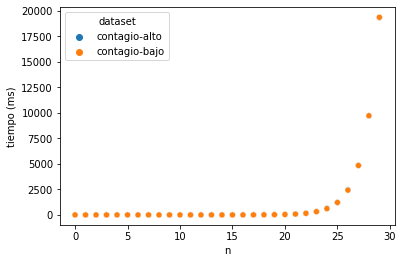

In [4]:
# Graficamos los tiempos de ejecución de cada dataset en función de n.
df_complejidad_FB = df_resultados[df_resultados["metodo"]=="FB"].copy();
fig = sns.scatterplot(data=df_complejidad_FB, x='n', y='tiempo', hue='dataset');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/fb-densidades.svg");

#Hacer zoom en el grafico de arriba para que se vean mejor los puntos azules

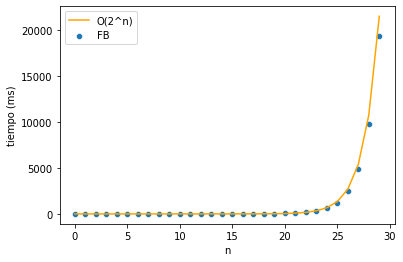

In [5]:
# Comparamos el dataset densidad-alta contra una función exponencial.
df_complejidad_FB = df_resultados[(df_resultados["metodo"]=="FB") & (df_resultados["dataset"]=="contagio-alto")].copy();
df_complejidad_FB["tiempo_esperado"] = 2.0 ** df_complejidad_FB["n"] * 0.00004; # Exponencial
fig = sns.scatterplot(data=df_complejidad_FB, x='n', y='tiempo');
fig = sns.lineplot(data=df_complejidad_FB, x='n', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(2^n)','FB']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/fb-complejidad.svg")

Índice de correlación de Pearson: 0.9999925485540608


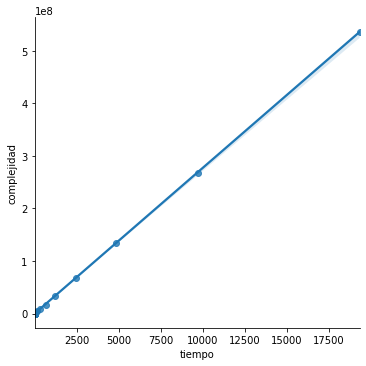

In [6]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_complejidad_FB = df_resultados[(df_resultados["metodo"]=="FB") & (df_resultados["dataset"]=="contagio-alto")].copy();
df_complejidad_FB["complejidad"] = 2.0 ** df_complejidad_FB["n"];
fig = sns.lmplot(data=df_complejidad_FB, x="tiempo", y="complejidad");
plt.savefig("graficos/fb-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_complejidad_FB, "tiempo", "complejidad"));

## Experimento 2: Complejidad de Backtracking
En este experimento evaluamos el método BT con los datasets mejor-caso-bt y peor-caso-bt. La hipótesis es que va a tener un comportamiento exponencial en el peor caso y lineal en el mejor caso.

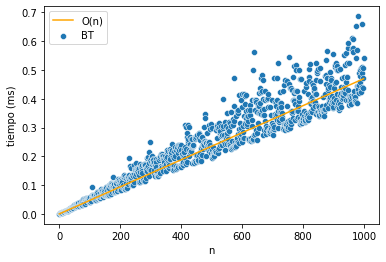

In [25]:
df_BT_mejor_caso = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "mejor-caso-bt")].copy();
df_BT_mejor_caso["tiempo_esperado"] = df_BT_mejor_caso["n"] * 0.00047; # Lineal
fig = sns.scatterplot(data=df_BT_mejor_caso, x='n', y='tiempo');
fig = sns.lineplot(data=df_BT_mejor_caso, x='n', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(n)','BT']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-complejidad-mejor-caso.svg");

Índice de correlación de Pearson: 0.945366576897663


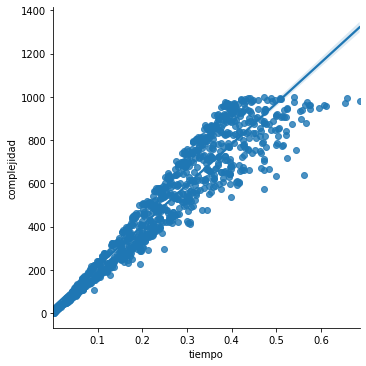

In [8]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_BT_mejor_caso = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "mejor-caso-bt")].copy();
df_BT_mejor_caso["complejidad"] = df_BT_mejor_caso["n"];
fig = sns.lmplot(data=df_BT_mejor_caso, x="tiempo", y="complejidad");
plt.savefig("graficos/bt-correlacion-mejor-caso.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_BT_mejor_caso, "tiempo", "complejidad"));

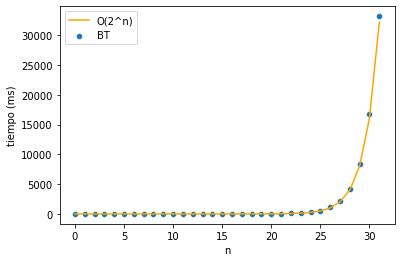

In [9]:
df_BT_peor_caso = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "peor-caso-bt")].copy();
df_BT_peor_caso["tiempo_esperado"] = 2 ** df_BT_peor_caso["n"] * 0.000015; # Exponencial.
fig = sns.scatterplot(data=df_BT_peor_caso, x='n', y='tiempo');
fig = sns.lineplot(data=df_BT_peor_caso, x='n', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(2^n)','BT']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-complejidad-peor-caso.svg");

Índice de correlación de Pearson: 0.9999774718647897


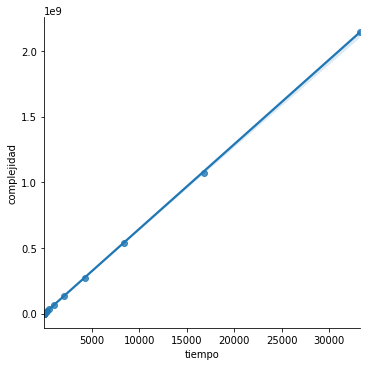

In [10]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_BT_peor_caso = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "peor-caso-bt")].copy();
df_BT_peor_caso["complejidad"] = 2.0 ** df_BT_peor_caso["n"];
fig = sns.lmplot(data=df_BT_peor_caso, x="tiempo", y="complejidad");
plt.savefig("graficos/bt-correlacion-peor-caso.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_BT_peor_caso, "tiempo", "complejidad"));

## Experimento 3: Análisis de las podas
Analizar Backtracking con y sin las podas para distintas densidades.

## 3.1 Análisis para contagio alto

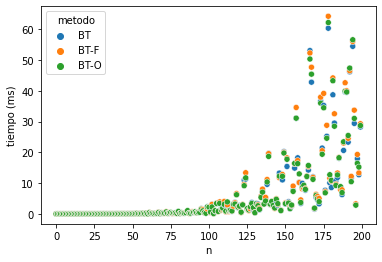

In [11]:
df_BT_contagio_alto = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="BT-F") | (df_resultados["metodo"]=="BT-O")) & (df_resultados["dataset"] == "contagio-alto")].copy();
df_BT_contagio_alto = df_BT_contagio_alto[df_BT_contagio_alto["tiempo"] < 2000]; # Sacamos outliers.
fig = sns.scatterplot(data=df_BT_contagio_alto, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-podas-alta.svg");

## Zoom

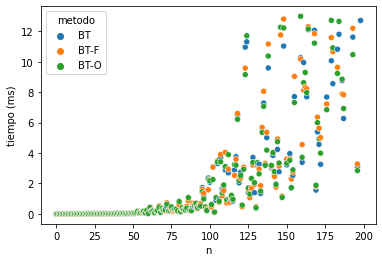

In [12]:
# Acercamos un poco la lupa para ver la diferencia entre BT y BT-O.
fig = sns.scatterplot(data=df_BT_contagio_alto[df_BT_contagio_alto["tiempo"]<13], x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-podas-alta-zoom.svg");

## 3.1 Análisis para contagio bajo.

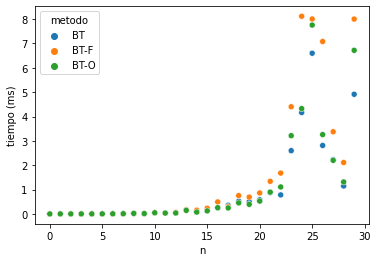

In [13]:
df_BT_contagio_bajo = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="BT-F") | (df_resultados["metodo"]=="BT-O")) & (df_resultados["dataset"] == "contagio-bajo")].copy();
fig = sns.scatterplot(data=df_BT_contagio_bajo, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-podas-baja.svg");

## 3.2 Podas para locales sin contagio:

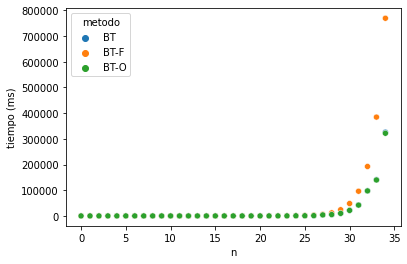

In [14]:
df_BT_sin_contagio = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="BT-F") | (df_resultados["metodo"]=="BT-O")) & (df_resultados["dataset"] == "sin-contagio")].copy();
fig = sns.scatterplot(data=df_BT_sin_contagio, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-podas-sin-contagio.svg");

## 3.3 Podas para beneficio igual y contagio alto:

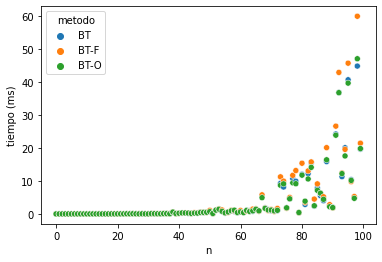

In [15]:
df_BT_beneficio_igual_contagio_alto = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="BT-F") | (df_resultados["metodo"]=="BT-O")) & (df_resultados["dataset"] == "beneficio-igual-contagio-alto")].copy();
fig = sns.scatterplot(data=df_BT_beneficio_igual_contagio_alto, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-podas-beneficio_igual_contagio_alto.svg");

# Experimento 4: Complejidad de programación dinámica
En este experimento analizamos el tiempo de ejecución real del algoritmo de programación dinámica y lo comparamos con su cota teórica para ver si en la práctica se comporta de manera similar.

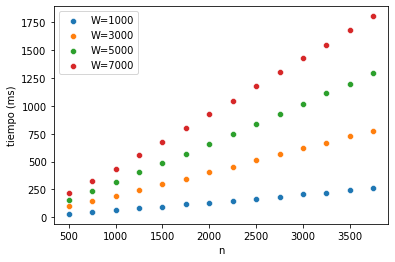

In [16]:
# Graficamos la evolución del tiempo de ejecución en función de n, con cortes en distintos W.
df_dinamica = df_resultados[(df_resultados["metodo"]=="DP") & (df_resultados["dataset"]=="dinamica")].copy();
fig = sns.scatterplot(data=df_dinamica[df_dinamica["W"]==1000], x='n', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["W"]==3000], x='n', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["W"]==5000], x='n', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["W"]==7000], x='n', y='tiempo');
fig.legend(labels=['W=1000','W=3000','W=5000','W=7000']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/dp-n.svg");

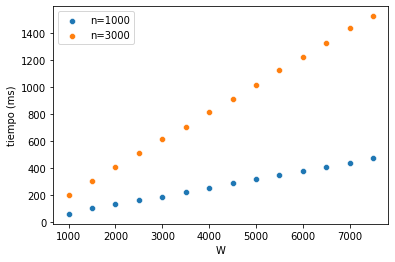

In [17]:
# Graficamos la evolución del tiempo de ejecución en función de W, con cortes en distintos n.
df_dinamica = df_resultados[(df_resultados["metodo"]=="DP") & (df_resultados["dataset"]=="dinamica")].copy();
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==1000], x='W', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==3000], x='W', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==5000], x='W', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==7000], x='W', y='tiempo');
fig.legend(labels=['n=1000','n=3000','n=5000','n=7000']);
fig.set(xlabel='W', ylabel='tiempo (ms)');
plt.savefig("graficos/dp-W.svg");

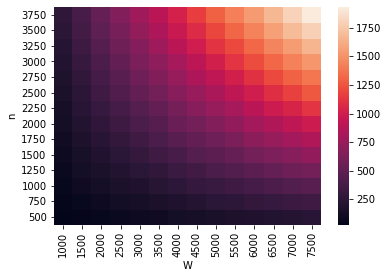

In [18]:
# Graficamos el tiempo de ejecución de las distintas instancias ordenadas por n y W.
df_dinamica = df_resultados[(df_resultados["metodo"]=="DP") & (df_resultados["dataset"]=="dinamica")].copy();
df_heatmap = df_dinamica.pivot_table(index='n', columns='W', values='tiempo', aggfunc=np.mean);
fig = sns.heatmap(df_heatmap);
fig.invert_yaxis();
plt.savefig("graficos/dp-heatmap.svg");

Índice de correlación de Pearson: 0.9995184611515157


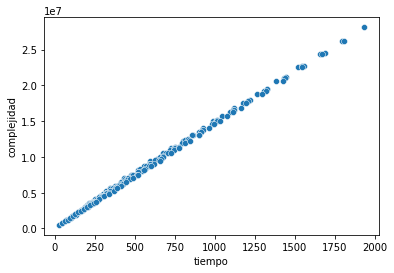

In [19]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_dinamica = df_resultados[(df_resultados["metodo"]=="DP") & (df_resultados["dataset"]=="dinamica")].copy();
df_dinamica["complejidad"] = df_dinamica["n"] * df_dinamica["W"];
fig = sns.scatterplot(data=df_dinamica, x="tiempo", y="complejidad");
plt.savefig("graficos/dp-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_dinamica, "tiempo", "complejidad"));

## Experimento 5: Comparación Backtacking y Programación Dinámica
En este experimento se trata de buscar para qué casos funciona mejor cada técnica. Por ejemplo, vamos a ejecutar BT y Dinámica sobre los datasets m-alto y m-bajo.

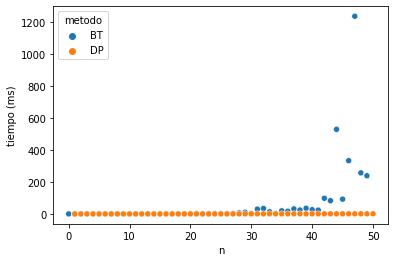

In [20]:
df_m_alto = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="DP")) & (df_resultados["dataset"] == "m-alto-dp")].copy();
fig = sns.scatterplot(data=df_m_alto, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/comparacion-bt-dp-alta.svg");

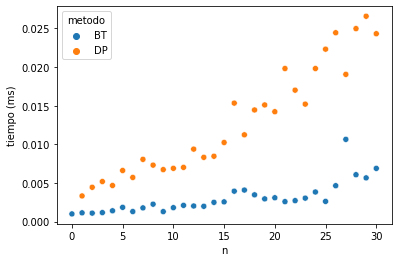

In [21]:
df_m_bajo = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="DP")) & (df_resultados["dataset"] == "m-bajo-dp")].copy();
df_m_bajo = df_m_bajo[df_m_bajo["n"]<=30];
fig = sns.scatterplot(data=df_m_bajo, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/comparacion-bt-dp-baja.svg");